In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
import pickle
import bz2
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from keras.models import Model
from wordcloud import WordCloud

# **Importing Datasets and Data Preprocessing**

In [2]:
url = "https://raw.githubusercontent.com/eddieir/Depression_detection_using_Twitter_post/master/depressive_tweets_processed.csv"
df= pd.read_csv(url, sep = '|', header = None, usecols = range(0,9))
print(df)

                       0           1         2                      3  \
0     989292962323615744  2018-04-25  23:59:57  Eastern Standard Time   
1     989292959844663296  2018-04-25  23:59:56  Eastern Standard Time   
2     989292951716155392  2018-04-25  23:59:54  Eastern Standard Time   
3     989292873664393218  2018-04-25  23:59:35  Eastern Standard Time   
4     989292856119472128  2018-04-25  23:59:31  Eastern Standard Time   
...                  ...         ...       ...                    ...   
2340  989036568781389830  2018-04-25  07:01:08  Eastern Standard Time   
2341  989036542898397185  2018-04-25  07:01:01  Eastern Standard Time   
2342  989036488162766848  2018-04-25  07:00:48  Eastern Standard Time   
2343  989036488158572544  2018-04-25  07:00:48  Eastern Standard Time   
2344  989036462271287297  2018-04-25  07:00:42  Eastern Standard Time   

                    4                                                  5   6  \
0            whosalli  The lack of this und

In [3]:
df = df[5]

**Removing Hashtags, Emoji, Image URLs, Hyperlinks, and Unwanted Punctuations**

In [4]:
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        # if url links then dont append to avoid news articles
        # also check tweet length, save those > 10 (length of word "depression")
        if re.match("(\w+:\/\/\S+)", tweet) == None and len(tweet) > 10:
            # remove hashtag, @mention, emoji and image URLs
            tweet = ' '.join(
                re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.>)|(pic\.twitter\.com\/.)", " ", tweet).split())
        
            tweet = re.sub(r"http\S+", "", tweet)

            # remove punctuation
            tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

            cleaned_tweets.append(tweet)

    return cleaned_tweets

In [5]:
df = clean_tweets(df)

In [6]:
tweets = pd.DataFrame(df)

In [7]:
tweets

,0
0,The lack of this understanding is a small but ...
1,i just told my parents about my depression and...
2,depression is something i don t speak about ev...
3,Made myself a tortilla filled with pb j My dep...
4,I am gonna need depression meds soon these rai...
...,...
2303,Many sufferers of depression aren t sad they f...
2304,No Depression by G Herbo is my mood from now o...
2305,What do you do when depression succumbs the br...
2306,Ketamine Nasal Spray Shows Promise Against Dep...


In [8]:
url1 = "../input/sentiment-analysis-depression-processed-dataset/trainlDataset.csv"
train= pd.read_csv(url1)
print(train)

                                                 Tweets          Label
0     Hello again me old friend depression Been a wh...     Depression
1     Exercising for 20 minutes a day cuts risk of d...     Depression
2     Mom s depression tied to kids emotional intell...     Depression
3     Sleeping Pill UK Most Affordable Cure for Inso...     Depression
4     nawaz1 Emoji Astonished face ohhhhhkkkk then y...     Depression
...                                                 ...            ...
3539                         Apex court puts work first  No Depression
3540   life term for Prof Saibaba. And more. In epap...  No Depression
3541  Good show by pales next to 329% jump in imports.   No Depression
3542         Backlash after hails as a 'true patriot'.   No Depression
3543                     Draupadi and campuses in erupt  No Depression

[3544 rows x 2 columns]


In [9]:
url2 = "../input/sentiment-analysis-depression-processed-dataset/testDataset.csv"
test= pd.read_csv(url2)
print(test)

                                                 Tweets          Label
0     More than 1 in 20 US children and teens have a...     Depression
1     I have both Generalized anxiety disorder and v...     Depression
2     theres depression and then theres eating half ...     Depression
3     As someone who struggles with severe depressio...     Depression
4     She definitely showed signs of alcoholism but ...     Depression
...                                                 ...            ...
1515                             cash cloak for parties  No Depression
1516                                         In village  No Depression
1517                      and more. Also in epaper. .12  No Depression
1518  Enforcement Directorate Chief Karnal Singh get...  No Depression
1519   all arrangements made to ensure free  fair el...  No Depression

[1520 rows x 2 columns]


In [10]:
train = shuffle(train)
test = shuffle(test)

In [11]:
train.Label.value_counts()

No Depression    1929
Depression       1615
Name: Label, dtype: int64

In [12]:
test.Label.value_counts()

No Depression    827
Depression       693
Name: Label, dtype: int64

In [13]:
train['Label_num'] = train.Label.map({'No Depression':0, 'Depression':1})
test['Label_num'] = test.Label.map({'No Depression':0, 'Depression':1})

**Training Dataset**

In [14]:
train

,Tweets,Label,Label_num
2132,Happy 420 everyone happy,No Depression,0
161,Excellent Brain decided today was a depression...,Depression,1
2525,to explain.,No Depression,0
774,Its good to hear Sometimes i kinda worried sin...,Depression,1
1409,Well I m bipolar I have anxiety and depression...,Depression,1
...,...,...,...
10,Depression Emoji Woman vampire light skin tone...,Depression,1
676,You are jst waste to society of Kenya Don t yo...,Depression,1
3209,3 switch to Selvam's side.,No Depression,0
1450,to the reason I do not speak of this I speak o...,Depression,1


**Testing Dataset**

In [15]:
test

,Tweets,Label,Label_num
55,I m going out on a limb here but it might have...,Depression,1
955,Thanks for being top engaged community members...,No Depression,0
564,this photo cleared my acne cured my depression...,Depression,1
1117,and more. Also in epaper. .41,No Depression,0
980,good morning,No Depression,0
...,...,...,...
1103,Pawar points out.,No Depression,0
1140,Govt seems to have slipped in an in Budget2017.,No Depression,0
525,being pan having ghey friends leaning to the l...,Depression,1
1381,4000 migrated in 2015 to shield their capital.,No Depression,0


In [16]:
x_train = train['Tweets']
y_train = train['Label_num']
x_test = test['Tweets']
y_test = test['Label_num']

**Function to evaluate Model Performance, Average Error and Accuracy**

In [17]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * abs(np.mean(errors / test_labels))
    accuracy = metrics.accuracy_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    print('Exact Accuracy Value: ')
    
    return accuracy

# **Training**

We used **Pipeline** as it assemble several steps that can be cross-validated together while setting different parameters.

The **TfidfVectorizer** will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. It converts a collection of raw documents to a matrix of TF-IDF features.

**Logistic Regression**

In [18]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 96.5789%


**Linear SVC**

In [19]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 97.3026%


**Multinomial Naive Bayes**

In [20]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 91.1184%


**Bernoulli Naive Bayes**

In [21]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 93.75%


**Gradient Boosting Classifier**

In [22]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 97.0395%


**XBoost Classifier**

In [23]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:09] WARNING: ../src/learner.cc:541: 
Parameters: { loss } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:38:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 97.2368%


**Stochastic Gradient Descent**

In [24]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', SGDClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 97.0395%


**Decision Tree Classifier**

In [25]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 96.6447%


**Random Forest** **Classifier** 

In [26]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('rfcRandom', RandomForestClassifier())])

rfcRandom = pipe.fit(x_train, y_train)
prediction = rfcRandom.predict(x_test)
accuracy_score(y_test, prediction)

0.9769736842105263

# **Optimizaton**

As we can see, Random Forest Classifier seems to be promising for higher accuracy.

**Optimizing Random Forest Classifier model using Hyperparameter Tuning**

In [27]:
vec = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii')
trainFreq = vec.fit_transform(train['Tweets'])
testFreq = vec.transform(test['Tweets'])
X_train = trainFreq
X_test = testFreq

In [28]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_predict = rfc.predict(X_test)
y_predict = pd.DataFrame(y_predict)
metrics.accuracy_score(y_test, y_predict)

0.9789473684210527

# **Plotting Validation Curve**

**n_estimator**

In [30]:
parameter_range = [100, 300, 500, 750, 800, 1200]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'n_estimators', param_range = parameter_range, cv = 3)

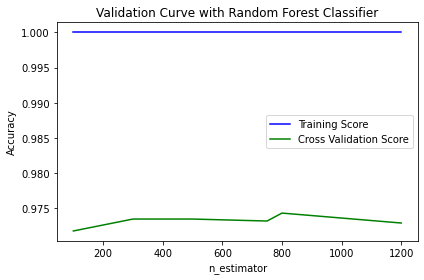

In [31]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("n_estimator") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**min_samples_leaf**

In [32]:
parameter_range = [1,2,3,4,5,6,7,8,9,10]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'min_samples_leaf', param_range = parameter_range, cv = 3)

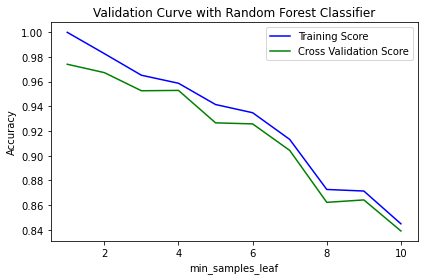

In [33]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("min_samples_leaf") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**min_samples_split**

In [34]:
parameter_range = [2,3,4,5,6,7,8,9,10]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'min_samples_split', param_range = parameter_range, cv = 3)

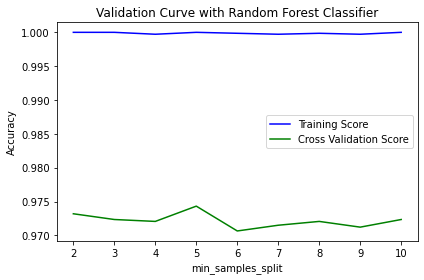

In [35]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("min_samples_split") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**max_features**

In [36]:
parameter_range = ['auto', 'sqrt']
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'max_features', param_range = parameter_range, cv = 3)

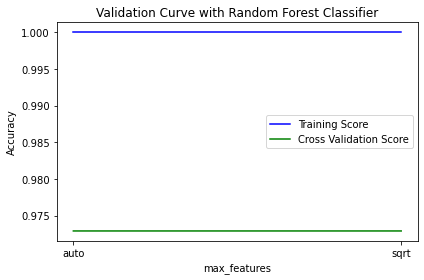

In [37]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("max_features") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**max_depth**

In [38]:
parameter_range = [100, 200, 300, 400, 500, 600]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'max_depth', param_range = parameter_range, cv = 3)

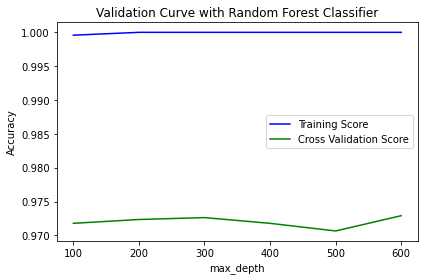

In [39]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("max_depth") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**max_leaf_nodes**

In [40]:
parameter_range = [100, 200, 300, 400, 500, 600]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'max_leaf_nodes', param_range = parameter_range, cv = 3)

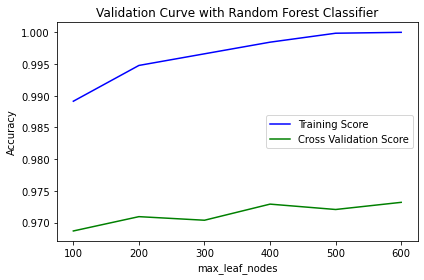

In [41]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("max_leaf_nodes") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**min_samples_leaf**

In [42]:
parameter_range = [1, 2, 3, 4, 5, 6, 7]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'min_samples_leaf', param_range = parameter_range, cv = 3)

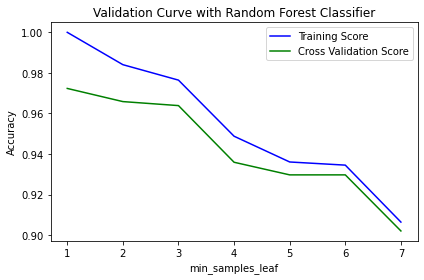

In [43]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("min_samples_leaf") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

# **Using RandomizedSearchCV for optimization**

Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [44]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [ int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 4, 5, 10]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 4, 5, 10], 'bootstrap': [True, False]}


In [45]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [46]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

# **Re-training the model using optimized parameters.**

In [48]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('rfcRandom', RandomForestClassifier(bootstrap = False,
 max_depth = 110,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split = 5,
 n_estimators = 1400))])

rfcRandom = pipe.fit(x_train, y_train)
prediction = rfcRandom.predict(x_test)
accuracy_score(y_test, prediction)

0.9789473684210527

# **Overall Model Performance**

In [49]:
evaluate(rfcRandom, x_test, y_test)

Model Performance
Average Error: 0.0211 degrees.
Accuracy = 0.98%.
Exact Accuracy Value: 


0.9789473684210527